### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # Adds nice background to graphs
%matplotlib inline

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [4]:
# Load the user rating data into pandas dataframe
user_rating_df = pd.read_csv("Data.csv")

In [5]:
# Load the movie data into pandas dataframe
movie_df = pd.read_csv("item.csv")

In [6]:
# Load the user data into pandas dataframe
user_df = pd.read_csv("user.csv")

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

 #### Applying info, shape describe and finding number of missing values for "user_rating" dataframe

In [5]:
# Checking column types and missing values
user_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
# checking no of rows and columns
user_rating_df.shape

(100000, 4)

In [7]:
# Creating summary statistics for numeric fields
user_rating_df.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [8]:
# Checking count of missing values in data
user_rating_df.isna().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

 #### Applying info, shape describe and finding number of missing values for "movie_df" dataframe

In [9]:
# Checking column types and missing values
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [10]:
# checking no of rows and columns
movie_df.shape

(1681, 22)

In [11]:
# Creating summary statistics for numeric fields
movie_df.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Checking count of missing values in data
movie_df.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

 #### Applying info, shape describe and finding number of missing values for "user_df" dataframe

In [13]:
# Checking column types and missing values
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [14]:
# checking no of rows and columns
user_df.shape

(943, 5)

In [15]:
# Creating summary statistics for numeric fields
user_df.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [16]:
# Checking count of missing values in data
user_df.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

### 4. Find the number of movies per genre using the item data-  2.5 marks

In [17]:
# this way of finding sum is good if we have less number of columns
movie_df[['Action','Comedy','Fantasy']].sum().to_frame().T

,Action,Comedy,Fantasy
0,251,505,22


In [18]:
# Another way of counting column value using integer location. iloc
movie_df.iloc[:,3:21].sum(axis=0).to_frame().T

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War
0,1,251,135,42,122,505,109,50,725,22,24,92,56,61,247,101,251,71


In [19]:
# Drop the 'movie id' and 'release date' column from dataframe and saved in movie_drop dataframe.
movie_drop = movie_df.drop(['movie id','release date'],axis=1) 
# Set 'movie title' as index and save to same dataframe
movie_drop.set_index('movie title',inplace=True)
# Now tranpose the datafrmae and saved into movie_drop_T dataframe
movie_drop_T=movie_drop.T
# Now sum the each row by passing axis=1 parameter in sum function and save value in new column.
movie_drop_T['Number_of_movies_per_genre'] = movie_drop_T.sum(axis=1)
# display the complete rows
movie_drop_T

movie title,Toy Story,GoldenEye,Four Rooms,Get Shorty,Copycat,Shanghai Triad (Yao a yao yao dao waipo qiao),Twelve Monkeys,Babe,Dead Man Walking,Richard III,...,Mamma Roma,"Sunchaser, The","War at Home, The",Sweet Nothing,Mat' i syn,B. Monkey,Sliding Doors,You So Crazy,Scream of Stone (Schrei aus Stein),Number_of_movies_per_genre
unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Action,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,251
Adventure,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,135
Animation,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42
Childrens,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,122
Comedy,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,505
Crime,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,109
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50
Drama,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,0,1,725
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [20]:
# finding the movie whose genre is unknown
movie_df[movie_df['unknown']==1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# drop the row using index value 1371 to drop the movie whose genre is unknown
movielist_without_unknown_genre = movie_df.drop([1371])

In [22]:
# verify the data, we did not find row for movie id = 1373
movielist_without_unknown_genre[movielist_without_unknown_genre['unknown']==1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [11]:
# summing all genre count along row and save that to new column name "genre_count"
movie_df['genre_count']=movie_df.drop(['movie id'],axis=1).sum(axis=1)

In [12]:
# it filter the row with count of genre greater than 1.
df_movie=movie_df[movie_df['genre_count']>1]

In [13]:
# it display the movie name and number of genre for each movie
df_movie[['movie title','genre_count']].head()

,movie title,genre_count
0,Toy Story,1998
1,GoldenEye,1998
2,Four Rooms,1996
3,Get Shorty,1998
4,Copycat,1998


In [26]:
# it print count of movies which has more than one genre. total count is 838
df_movie['movie title'].nunique()

838

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

### Univariate plot for 'age' column

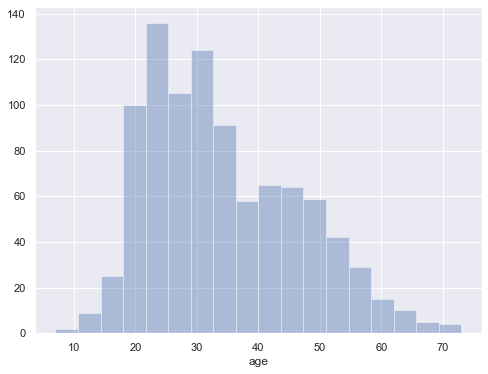

In [27]:
# it create a histogram of variable 'age' from user_df dataframe
plt.figure(figsize=(8,6))
sns.distplot(user_df['age'],kde=0);

### Univariate plot for 'gender' column

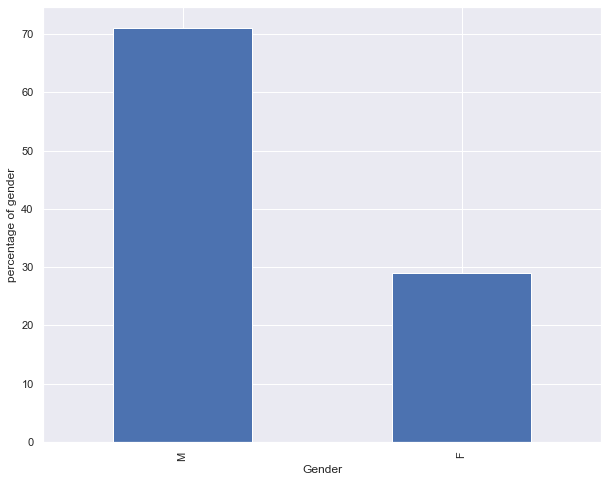

In [28]:
# it plot the bar chart with percentage on y-axis and categories on x-axis for 'gender' column from user_df dataframe.
plt.figure(figsize=(10,8))
plt.ylabel('percentage of gender')
plt.xlabel('Gender')
(user_df['gender'].value_counts(normalize=True)*100).plot.bar();

### Univariate analysis for 'Occupation' column

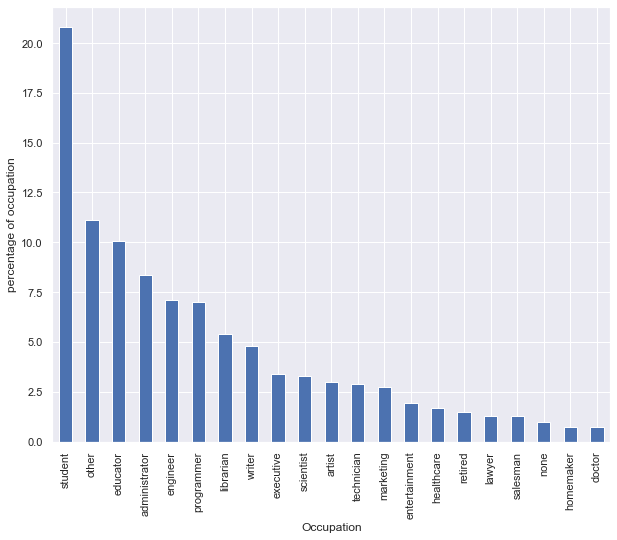

In [29]:
# it plot bar chart with percentage on y-axis and catgories on x-axis for 'occupation' column from user_df dataframe.
plt.figure(figsize=(10,8))
plt.ylabel('percentage of occupation')
plt.xlabel('Occupation')
(user_df['occupation'].value_counts(normalize=True)*100).plot.bar();

### Univariate plot for 'rating' column

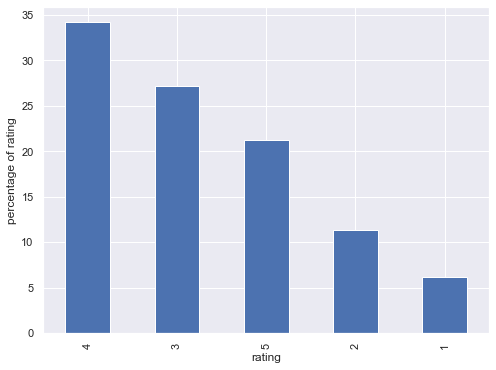

In [30]:
# it plot bar chart with percentage on y-axis and catgories on x-axis for 'rating' column from user_rating_df dataframe.
plt.figure(figsize=(8,6))
plt.ylabel('percentage of rating')
plt.xlabel('rating')
(user_rating_df['rating'].value_counts(normalize=True)*100).plot.bar();

### Univariate plot for 'release date' column

In [31]:
movie_df['release date'].str[7:].astype('int32')

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1676    1998
1677    1998
1678    1998
1679    1994
1680    1996
Name: release date, Length: 1681, dtype: int32

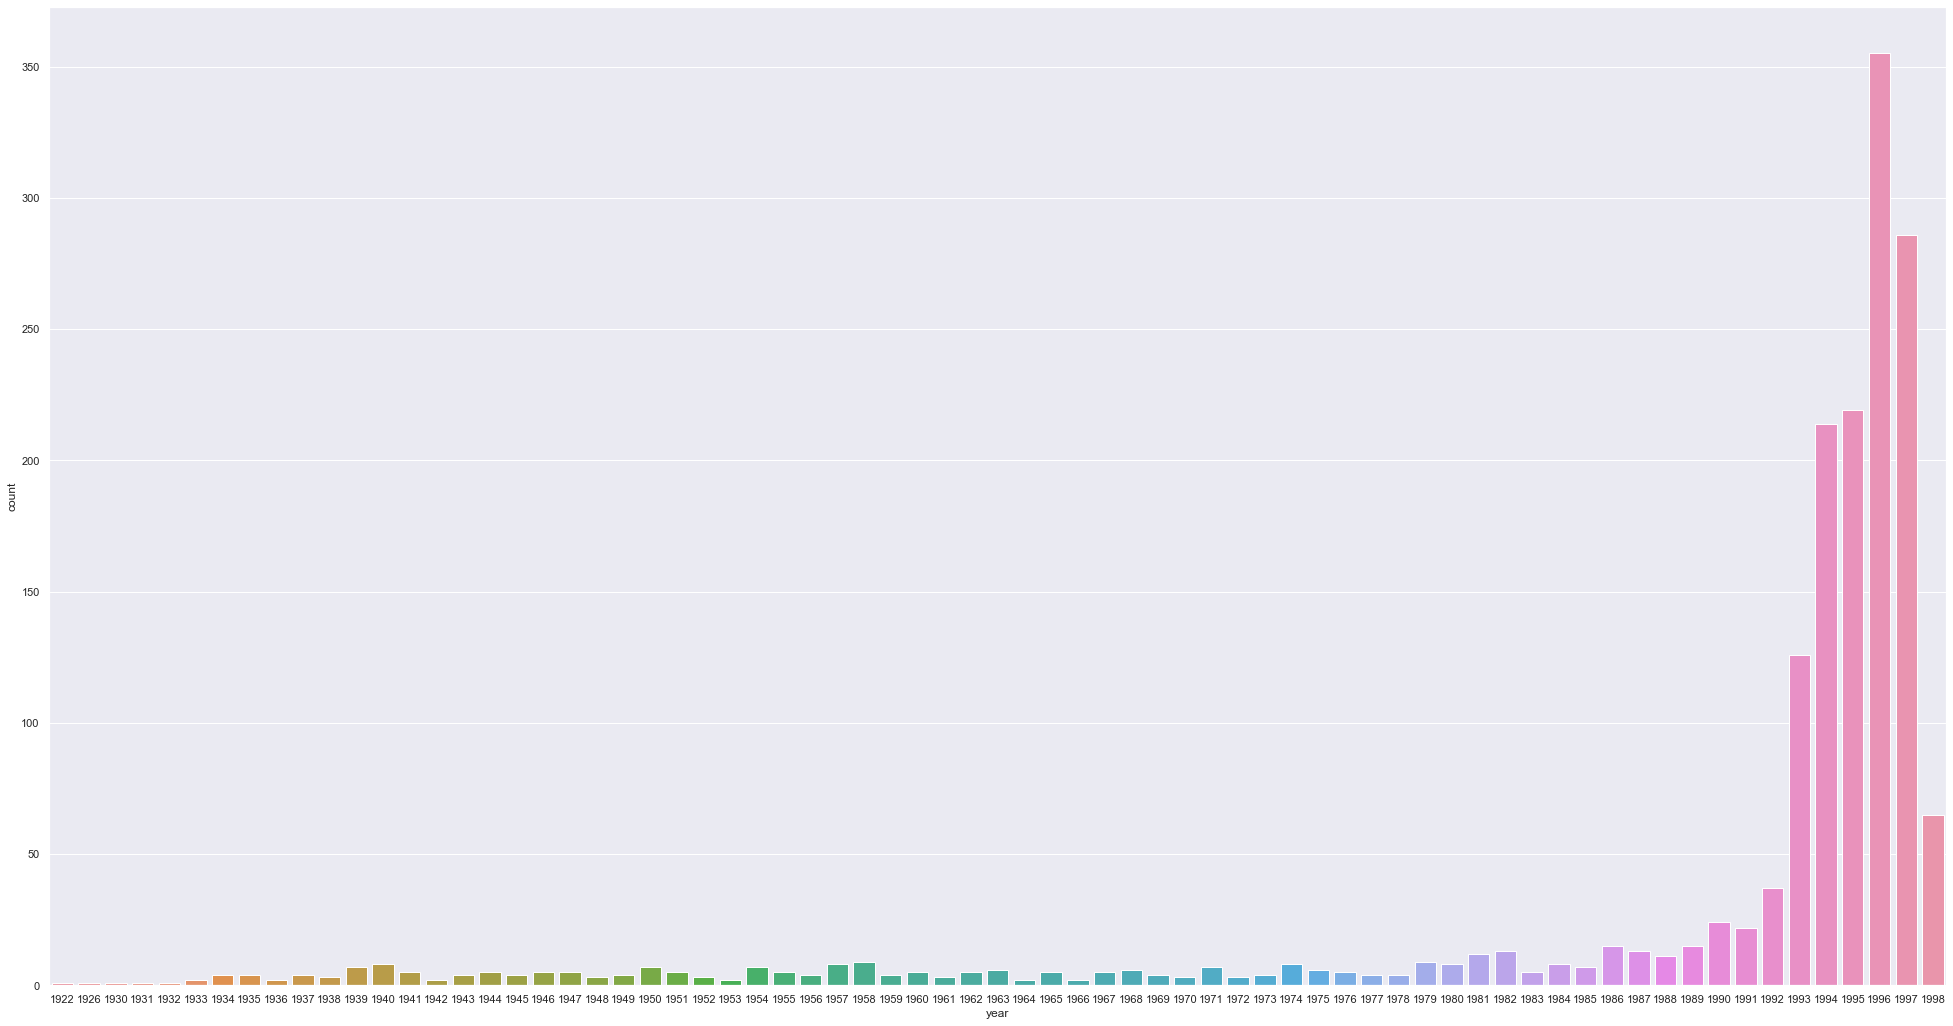

In [8]:
# used split functin on 'release date' column from movie_df dataframe to get year value.
movie_df['year']=movie_df['release date'].str.split('-').str[2]
plt.figure(figsize=(34,18))
sns.countplot(movie_df['year']);

### Univariate plot for 'release date' column using datetime module

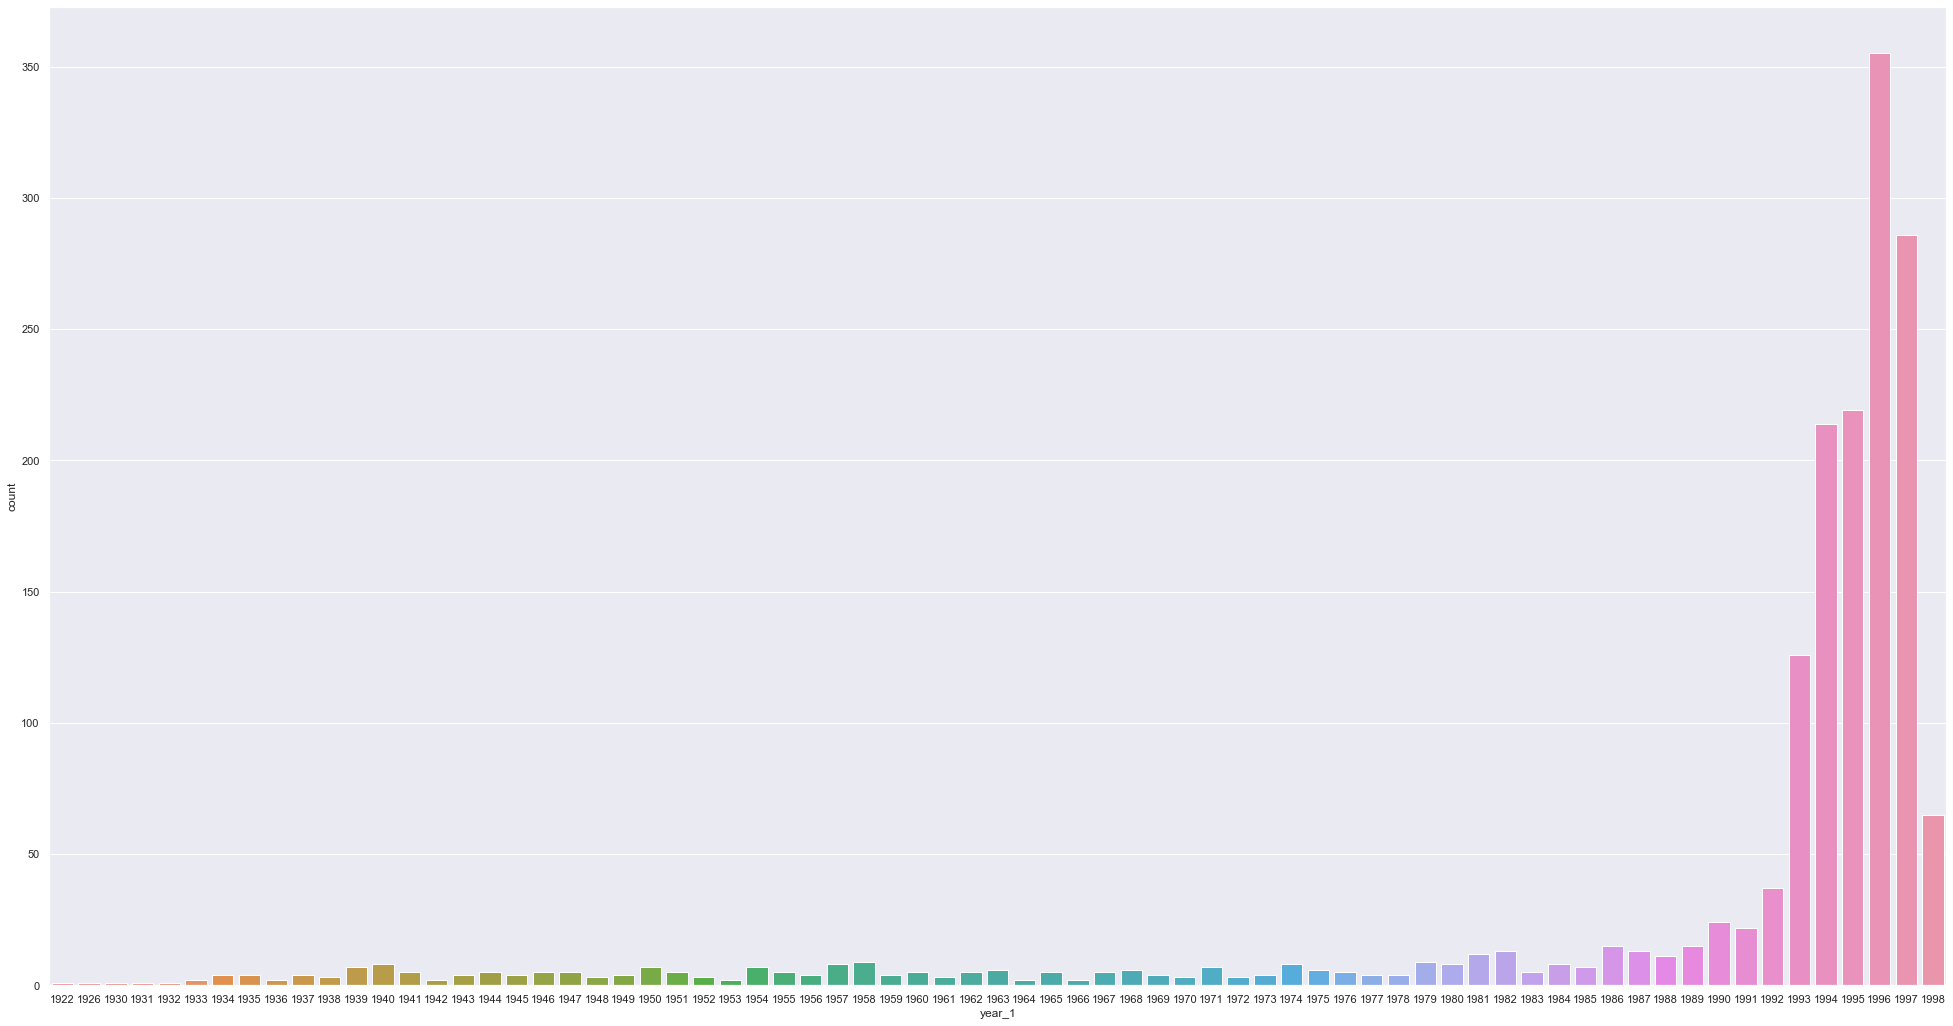

In [9]:
# Another method to get year value from 'release date' column of movie_df dataframe
# Working on 'release year' column using pandas datetime format to extract the year value. 
from datetime import datetime # Import datetime library
movie_df['release_date'] = movie_df['release date'].apply(lambda x : datetime.strptime(x, '%d-%b-%Y'))
movie_df['year_1'] = movie_df['release_date'].dt.year # created 'year_1' column to save year value using inbuilt functionalities of datatime module
plt.figure(figsize=(34,18))
sns.countplot(movie_df['year_1']); # now created a count plot to get count of unique year using 'year_datetime'

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [14]:
# dropping columns of movie_df dataframe and saving result in 'movie_df_column_drop' dataframe
movie_df_column_drop=movie_df.drop(['movie id','movie title','release date','year_1','release_date','genre_count'],axis=1)

In [15]:
# 
genre_by_year = movie_df_column_drop.groupby('year').sum().T
genre_by_year['total']=genre_by_year.sum(axis=1)
genre_by_year

year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,total
unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Action,0,0,0,0,0,0,0,0,0,0,...,7,2,8,20,30,40,44,46,12,251
Adventure,0,0,0,0,0,0,0,0,0,0,...,1,1,1,9,13,22,24,20,3,135
Animation,0,0,0,0,0,0,0,0,0,1,...,0,1,2,1,4,6,9,3,0,42
Childrens,0,0,0,0,0,0,0,0,0,1,...,1,1,1,6,15,21,21,22,1,122
Comedy,0,0,0,0,0,1,2,2,1,2,...,6,6,12,39,82,63,108,87,13,505
Crime,0,0,0,1,0,0,0,0,0,0,...,3,0,5,7,8,11,21,30,7,109
Documentary,0,0,0,0,0,0,0,0,0,0,...,2,1,0,4,9,5,18,6,3,50
Drama,0,1,1,0,0,0,1,0,1,1,...,12,11,14,64,97,89,170,113,33,725
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,3,3,6,4,1,22


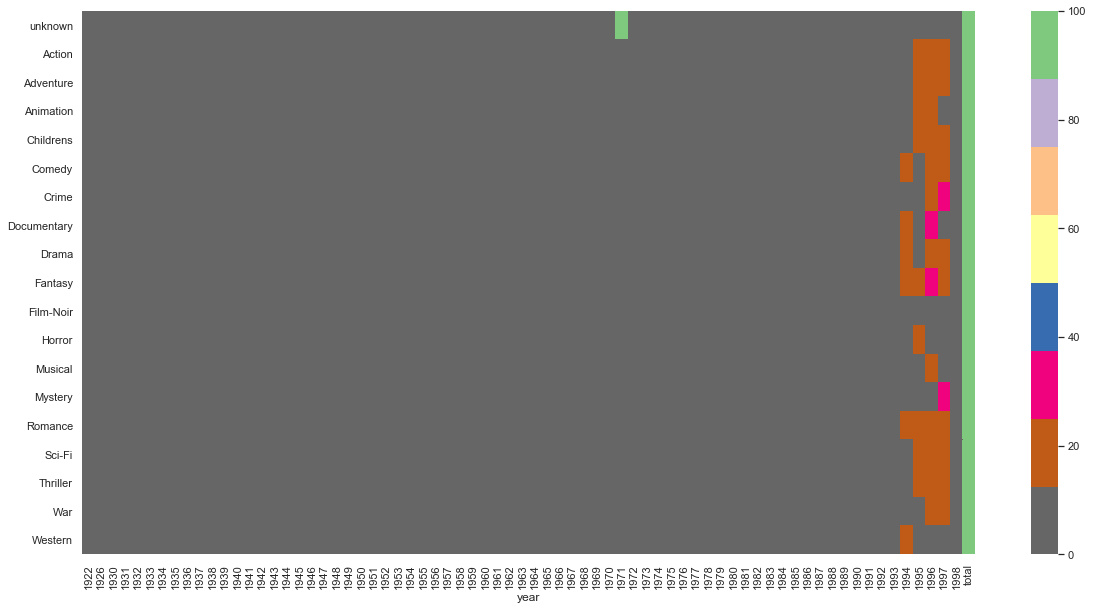

In [19]:
# Now divided the value of each genre in that year by total to get percentage number of release in a particular year
# and used heatmap to vizualize the changes 
plt.figure(figsize=(20,10))
sns.heatmap(genre_by_year.div(genre_by_year['total'],axis=0)*100,cmap='Accent_r')

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [32]:
# merge the 'movie_df' and 'user_rating_df' dataframe on column 'movie_id' and save result in movie_user_rating_df
movie_user_rating_df = pd.merge(movie_df,user_rating_df,how='inner',on='movie id')
movie_user_rating_df.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Thriller,War,Western,year,release_date,year_1,genre_count,user id,rating,timestamp
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,1995,1995-01-01,1995,1998,308,4,887736532
1,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,1995,1995-01-01,1995,1998,287,5,875334088
2,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,1995,1995-01-01,1995,1998,148,4,877019411
3,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,1995,1995-01-01,1995,1998,280,4,891700426
4,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,1995,1995-01-01,1995,1998,66,3,883601324


In [33]:
# performed the counting of rating based on movie title and saved result into movie_rating_count dataframe
movie_rating_count = movie_user_rating_df.groupby('movie title').count()['rating'].reset_index()
movie_rating_count.head()

,movie title,rating
0,'Til There Was You,9
1,1-900,5
2,101 Dalmatians,109
3,12 Angry Men,125
4,187,41


In [34]:
# calculate the average rating for each movie title and save into 'movie_rating_average'
movie_rating_average = movie_user_rating_df.groupby('movie title').mean()['rating'].reset_index()
movie_rating_average.head()

,movie title,rating
0,'Til There Was You,2.333333
1,1-900,2.600000
2,101 Dalmatians,2.908257
3,12 Angry Men,4.344000
4,187,3.024390


In [35]:
# merge the 'movie_rating_count' and 'user_rating_average' dataframe on column 'movie title' and save result in movie_count_average
movie_count_average = pd.merge(movie_rating_count,movie_rating_average,how='inner',on='movie title')
movie_count_average.head()

,movie title,rating_x,rating_y
0,'Til There Was You,9,2.333333
1,1-900,5,2.600000
2,101 Dalmatians,109,2.908257
3,12 Angry Men,125,4.344000
4,187,41,3.024390


In [24]:
# Renaming column name to relevant name
movie_count_average_rename = movie_count_average.rename(columns={'rating_x':'rating_count','rating_y':'rating_avg'})

In [25]:
# Get the movie detail whose rating count is more than 100
movie_count_gt_100 = movie_count_average_rename[movie_count_average_rename['rating_count']>100]

In [26]:
# top 25 movies with highest average rating having number of rating more than 100
movie_count_gt_100.sort_values(by='rating_avg',ascending=False).head(25) 

,movie title,rating_count,rating_avg
317,"Close Shave, A",112,4.491071
1278,Schindler's List,298,4.466443
1647,"Wrong Trousers, The",118,4.466102
272,Casablanca,243,4.456790
1313,"Shawshank Redemption, The",283,4.445230
1214,Rear Window,209,4.387560
1567,"Usual Suspects, The",267,4.385768
1394,Star Wars,583,4.358491
3,12 Angry Men,125,4.344000
302,Citizen Kane,198,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want to use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [36]:
# merge the 'user_df' and 'user_rating_df' on column 'user id' and saved to 'user_and_rating_df'
user_and_rating_df = pd.merge(user_df,user_rating_df,how='inner',on='user id')

In [37]:
# merge the 'user_and_rating_df' and 'movie_df' on column 'movie id' and saved to 'user_rating_movie_df'
user_rating_movie_df = pd.merge(user_and_rating_df,movie_df,how='inner',on='movie id')

In [38]:
# Drop columns permanently
user_rating_movie_df.drop(['user id','age','occupation','zip code','timestamp','release date','year','movie id','movie title','genre_count','release_date','year_1'],axis=1,inplace=True)

In [44]:
# Counting total number of rating based on gender.
new_df_GR = user_rating_movie_df.groupby('gender').count()['rating'].reset_index()
new_df_GR

,gender,rating
0,F,25738
1,M,74253


In [41]:
# sum the 'Drama' column based on 'gender'
new_df_GD = user_rating_movie_df.groupby('gender').sum()['Drama'].reset_index()
new_df_GD

,gender,Drama
0,F,11008
1,M,28887


In [54]:
# merge the new_df_GD & new_df_GR based on gender column
new_df_merge = pd.merge(new_df_GD,new_df_GR,how='inner',on='gender')
new_df_merge

,gender,Drama,rating
0,F,11008,25738
1,M,28887,74253


In [55]:
# set 'gender' as new index
new_df_merge.set_index('gender',inplace=True)
new_df_merge

,Drama,rating
gender,,
F,11008,25738
M,28887,74253


In [56]:
# used div function to get percentage of drama column
new_df_merge.div(new_df_merge['rating'],axis=0)*100

,Drama,rating
gender,,
F,42.769446,100.0
M,38.903479,100.0


**1st hypothesis: Men watch more drama than women** 
* Of all the ratings given by women 43% were for Drama and for Men it was 39%. Therefore the statement is false. Women watch more Drama.  

In [42]:
# Get the sum of 'Sci-Fi' column based on gender and rating column and saved to 'new_df_GRSF'
new_df_GSF = user_rating_movie_df.groupby('gender').sum()['Sci-Fi'].reset_index()
new_df_GSF

,gender,Sci-Fi
0,F,2629
1,M,10101


In [55]:
# now merge new_df_GR and new_df_GSF on gender column and saved to new df_merge_GRSF
new_df_merge_GRSF = pd.merge(new_df_GR,new_df_GSF,how='inner',on='gender')
new_df_merge_GRSF

,gender,rating,Sci-Fi
0,F,25738,2629
1,M,74253,10101


In [56]:
# set index to gender
new_df_merge_GRSF.set_index('gender',inplace=True)

In [57]:
# used div function to get percentage of drama column
new_df_merge_GRSF.div(new_df_merge_GRSF['rating'],axis=0)*100

,rating,Sci-Fi
gender,,
F,100.0,10.214469
M,100.0,13.603491


**2nd Hypothesis: Women watch more Sci-Fi than men**
* Of all the ratings given by women 10% were for Sci-FI movies and for Men it was 14%. Therefore the statement is false. Men watch more Sci-Fi

In [58]:
# Get sum of Romance based on gender and rating column and saved to ;new_df_GRR
new_df_GRR = user_rating_movie_df.groupby('gender').sum()['Romance'].reset_index()
new_df_GRR

,gender,Romance
0,F,5858
1,M,13603


In [59]:
# merging new_df_GRomance & new_df_GR based on gender and saved to new_df_merge_GRR
new_df_merge_GRR = pd.merge(new_df_GRR,new_df_GR,how='inner',on='gender')
new_df_merge_GRR

,gender,Romance,rating
0,F,5858,25738
1,M,13603,74253


In [60]:
# set index to gender
new_df_merge_GRR.set_index('gender',inplace=True)

In [61]:
# used div function to get percentage of Romance column
new_df_merge_GRR.div(new_df_merge_GRR['rating'],axis=0)*100

,Romance,rating
gender,,
F,22.760121,100.0
M,18.319799,100.0


**3rd: Men watch more Romance than women**
* Of all the ratings given by women 23% were for Romance movies and for Men it was 18%. Therefore the statement is false. Women watch more Romance